In [ ]:
import pandas as pd


In [ ]:
df_1 = pd.read_csv('winequality-red.csv',sep = ";")
df_2 = pd.read_csv('winequality-white.csv', sep = ";")
df = pd.concat([df_1, df_2], ignore_index=True)
df.to_csv('winequality_full.csv', sep=';', index=False)

In [ ]:
df_all = pd.read_csv('winequality_full.csv',sep = ";")
display(df_all)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Criando uma nova feature ou tranformando uma feature com base na feauture quality para ser uma classificação binaria

In [ ]:
# 0 = bom vinho, 1 = vinho ruim
df_all["qualidade_binaria"] = df_all["quality"].apply(lambda x: 0 if x <= 5 else 1)

In [ ]:
display(df_all)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_binaria
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
x_f = df_all.drop(["quality", "qualidade_binaria"], axis=1)
y_f = df_all["qualidade_binaria"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt

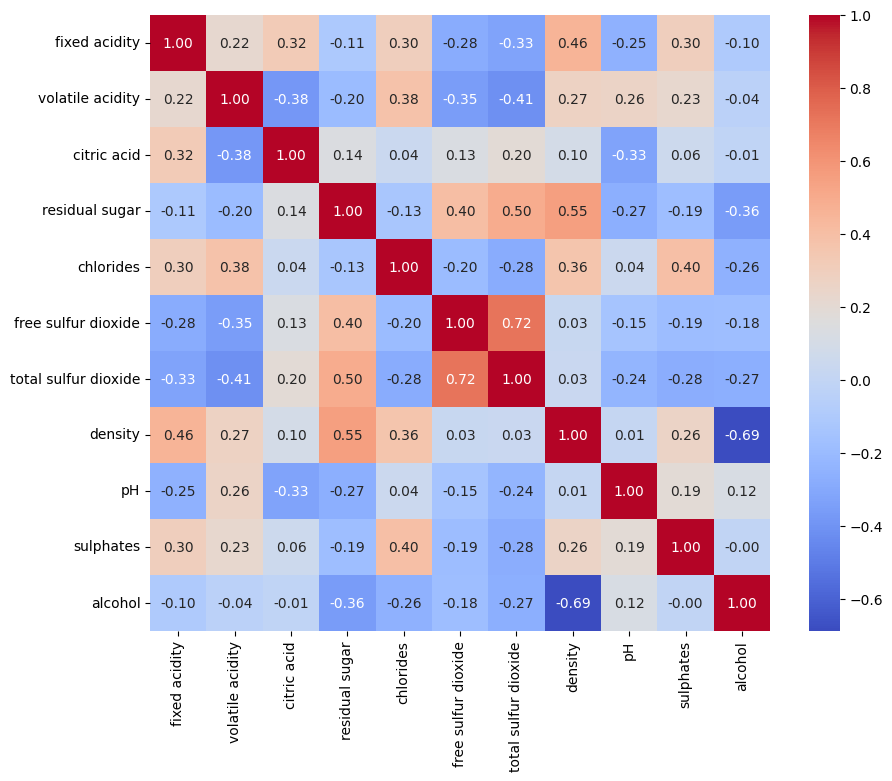

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(x_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


Calculando a VIF (Variance Inflation Factor) para verificar a multicolinearidade

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)


                Variável           VIF
0                  const  1.699783e+06
1          fixed acidity  4.896925e+00
2       volatile acidity  1.949413e+00
3            citric acid  1.608220e+00
4         residual sugar  7.228979e+00
5              chlorides  1.631958e+00
6    free sulfur dioxide  2.135481e+00
7   total sulfur dioxide  2.937601e+00
8                density  1.591450e+01
9                     pH  2.536522e+00
10             sulphates  1.541526e+00
11               alcohol  4.782130e+00


A variável density apresenta um VIF de aproximadamente 15,9, o que indica que
a variável density está altamente correlacionada com outras variáveis preditoras.

Aplicando o PCA nas Variáveis Density, Residual Sugar e Alcohol, essas duas junto com Density porque elas eram as mais correlacionadas com ela (visto no gráfico de correlação acima)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_to_combine = ['density', 'residual sugar', 'alcohol']

X_group = x_f[features_to_combine]

scaler = StandardScaler()
X_group_scaled = scaler.fit_transform(X_group)

pca = PCA(n_components=1)
combined_feature = pca.fit_transform(X_group_scaled)

x_f['combinação_componentes'] = combined_feature

In [ ]:
display(x_f)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,combinação_componentes
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.797437
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.469180
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.478786
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.646377
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.797437
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,-1.510621
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.751732
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,-0.388871
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,-2.855180


In [ ]:
# Dropando as antigas variáveis, já que temos agora elas combinadas em uma só
x_f = x_f.drop(['density', 'residual sugar', 'alcohol'], axis=1)

In [ ]:
display(x_f)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,combinação_componentes
0,7.4,0.70,0.00,0.076,11.0,34.0,3.51,0.56,0.797437
1,7.8,0.88,0.00,0.098,25.0,67.0,3.20,0.68,0.469180
2,7.8,0.76,0.04,0.092,15.0,54.0,3.26,0.65,0.478786
3,11.2,0.28,0.56,0.075,17.0,60.0,3.16,0.58,0.646377
4,7.4,0.70,0.00,0.076,11.0,34.0,3.51,0.56,0.797437
...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,0.039,24.0,92.0,3.27,0.50,-1.510621
6493,6.6,0.32,0.36,0.047,57.0,168.0,3.15,0.46,0.751732
6494,6.5,0.24,0.19,0.041,30.0,111.0,2.99,0.46,-0.388871
6495,5.5,0.29,0.30,0.022,20.0,110.0,3.34,0.38,-2.855180


Verificando mais uma vez o VIF (Variance Inflation Factor)

In [ ]:
x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)

                 Variável         VIF
0                   const  726.896740
1           fixed acidity    1.858710
2        volatile acidity    1.710570
3             citric acid    1.576622
4               chlorides    1.469304
5     free sulfur dioxide    2.120650
6    total sulfur dioxide    2.790817
7                      pH    1.379259
8               sulphates    1.342384
9  combinação_componentes    1.364220


Tudo certo, podemos continuar

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_f, y_f, test_size=0.2)

In [ ]:
display(x_treino)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,combinação_componentes
1194,7.0,0.745,0.12,0.114,15.0,64.0,3.22,0.59,0.332997
1775,7.2,0.320,0.47,0.044,19.0,65.0,3.03,0.41,-1.836199
768,7.1,0.590,0.02,0.082,24.0,94.0,3.55,0.53,0.619974
4960,6.4,0.170,0.27,0.047,26.0,101.0,3.34,0.50,1.037028
5759,7.4,0.160,0.30,0.056,33.0,168.0,2.90,0.44,2.513233
...,...,...,...,...,...,...,...,...,...
3009,7.1,0.260,0.32,0.037,39.0,97.0,3.31,0.40,-0.759495
3747,7.1,0.330,0.64,0.056,12.0,105.0,3.05,0.39,1.995672
2169,7.4,0.410,0.66,0.051,77.0,194.0,3.05,0.46,2.060826
5283,6.8,0.310,0.30,0.028,33.0,122.0,3.13,0.63,-1.385903


In [ ]:
display(y_treino)

,qualidade_binaria
1194,1
1775,0
768,1
4960,1
5759,1
...,...
3009,1
3747,0
2169,0
5283,1


In [ ]:
coords = {
    'features': ['fixed acidity',	'volatile acidity', 'citric acid' ,	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'pH','sulphates',	'combinação_componentes']
}

In [ ]:
with pm.Model(coords=coords) as model:
  betas = pm.Normal("beta",0,1,dims="features")
  alpha = pm.Normal("alpha",0,1)

  X = [
    pm.MutableData("X_"+column,x_treino[column].values)
    for column in x_treino.columns if np.issubdtype(x_f[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_treino)

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.11/dist-packages/pymc/data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


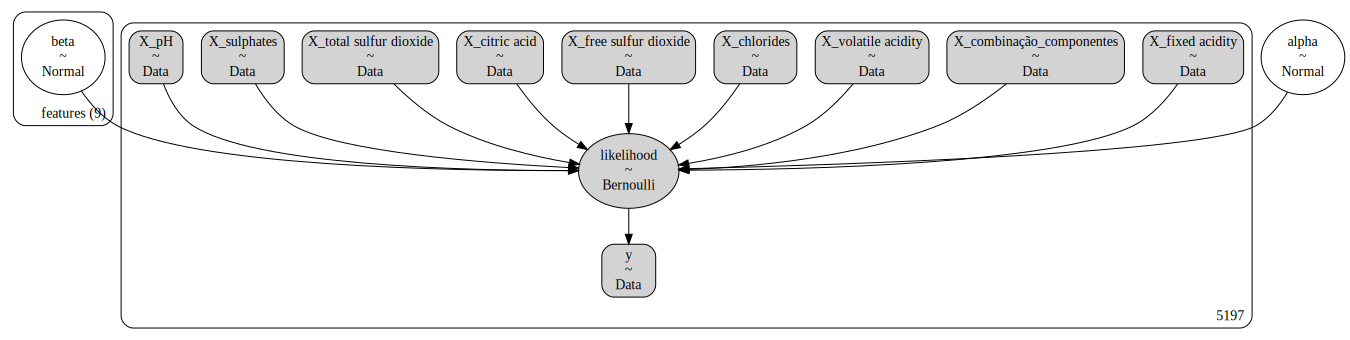

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
  approx = pm.fit(35000)

Output()

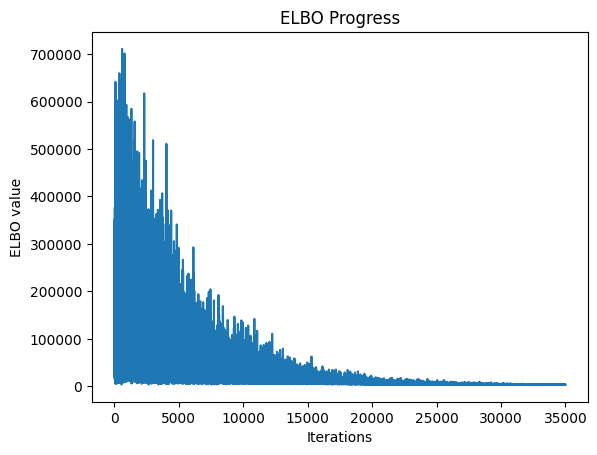

In [ ]:
plt.plot(approx.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

A parti de 30000 o modelo ficou estável com minimas variações

In [ ]:
with model:
  trace = approx.sample(10000)

In [ ]:
pm.summary(trace)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.036,0.187,-0.307,0.395,0.002,0.001,9589.0,9530.0,NaN
beta[fixed acidity],0.072,0.030,0.015,0.128,0.000,0.000,9483.0,9577.0,NaN
beta[volatile acidity],-1.543,0.320,-2.178,-0.977,0.003,0.002,10108.0,9490.0,NaN
beta[citric acid],0.529,0.382,-0.230,1.202,0.004,0.003,9918.0,10085.0,NaN
beta[chlorides],-0.996,0.650,-2.194,0.240,0.007,0.005,9876.0,8744.0,NaN
beta[free sulfur dioxide],0.028,0.007,0.014,0.041,0.000,0.000,9533.0,9329.0,NaN
beta[total sulfur dioxide],-0.005,0.002,-0.009,-0.001,0.000,0.000,10381.0,9342.0,NaN
beta[pH],0.028,0.070,-0.106,0.159,0.001,0.000,9994.0,9195.0,NaN
beta[sulphates],0.333,0.274,-0.171,0.846,0.003,0.002,10065.0,8754.0,NaN
beta[combinação_componentes],-0.538,0.070,-0.669,-0.408,0.001,0.000,9626.0,8920.0,NaN


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

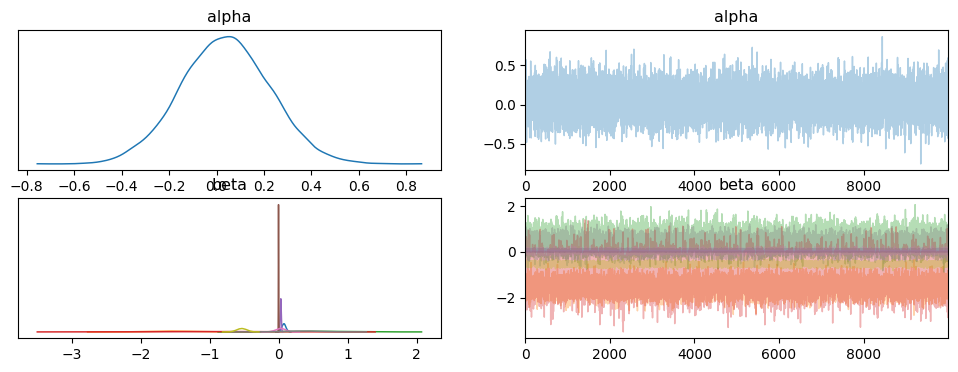

In [ ]:
az.plot_trace(trace)

In [ ]:
vars = {"X_"+column : x_teste[column].values
    for column in x_teste.columns if np.issubdtype(x_teste[column].dtype, np.number)}
vars["y"] = y_teste

In [ ]:
with model:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

Output()

In [ ]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
predicao = (mean_likelihood > 0.5).astype(int)

In [ ]:
abs_diff = np.abs(y_teste - predicao)

df = pd.DataFrame({
    'y_teste': y_teste,
    'Predição_modelo': predicao,
    'absoluta_diferença': abs_diff
})

df

,y_teste,Predição_modelo,absoluta_diferença
1387,0,0,0
4802,1,1,0
1673,1,1,0
4804,1,1,0
1583,0,1,1
...,...,...,...
6037,0,1,1
4882,1,1,0
1816,0,1,1
2014,1,0,1


In [ ]:
errors = df["absoluta_diferença"].sum()
acc = (len(df)-errors)/len(df)
print(f"acurácia: {acc:.4f}")
print(f"Erros: {errors}")

acurácia: 0.6846
Erros: 410


Uma Acurácia de 68.46% é ok, porém ainda há espaço para melhora

In [ ]:
class1 = df["y_teste"].sum()
class0 = len(df)-class1

print(f"Classe vinho ruim: {class0}")
print(f"Classe vinho bom: {class1}")

Classe vinho ruim: 475
Classe vinho bom: 825


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_teste, predicao)

recall = recall_score(y_teste, predicao)

f1 = f1_score(y_teste, predicao)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7098
Recall: 0.8509
F1 Score: 0.7740


Precisão: 71%​
Isso sugere que o modelo tem uma taxa moderada de falsos positivos.

Recall: 85,09%​
indicando uma boa capacidade de detectar casos positivos e uma taxa relativamente baixa de falsos negativos.

F1 Score: 77,40%
Esse valor sugere um desempenho sólido do modelo.

# **Consideração Final**
O modelo apresentou um desempenho ok, porém com espaço para melhorar, talvez testar outro modelo para classificação